In [70]:
import numpy as np
from keras.datasets import cifar10
from keras.applications.vgg16 import VGG16
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [71]:
# Load CIFAR - 10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [72]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [73]:
# Normalize the pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [74]:
# One - hot encode the labels (CIFAR - 10 has 10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [75]:
# Load VGG16 model pre-trained on ImageNet, without the top layers (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False)

In [76]:
# Freeze the layers  of VGG16
for layer in base_model.layers:
    layer.trainable = False

In [77]:
# Build the model
model = Sequential()

# Define input shape for the Sequential model
model.add(InputLayer(input_shape=(32, 32, 3)))

# Add the VGG16 base model
model.add(base_model)

# Flatten the output from VGG16's convolutional layers
model.add(Flatten())

# Add a fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add Dropout for regularization
model.add(Dropout(0.5))

# Add output layyer with 10 units (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [78]:
# Data augmentation to reduce overfitting
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [79]:
# Fit the model using data augmentation
batch_size = 64
epochs = 2
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

In [80]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=x_train.shape[0],
                    epochs=epochs,
                    validation_data=(x_test,y_test)
                    )

Epoch 1/2
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 90s 2ms/step - accuracy: 0.2938 - loss: 1.9817 - val_accuracy: 0.4501 - val_loss: 1.6237
Epoch 2/2
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 91s 2ms/step - accuracy: 0.4224 - loss: 1.6539 - val_accuracy: 0.4991 - val_loss: 1.4764


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


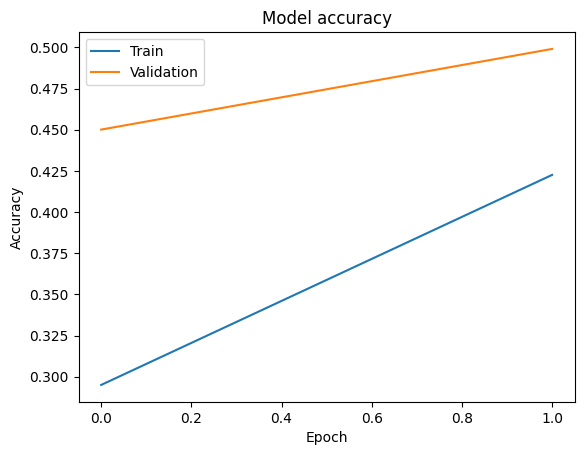

In [82]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc ='upper left')
plt.show()

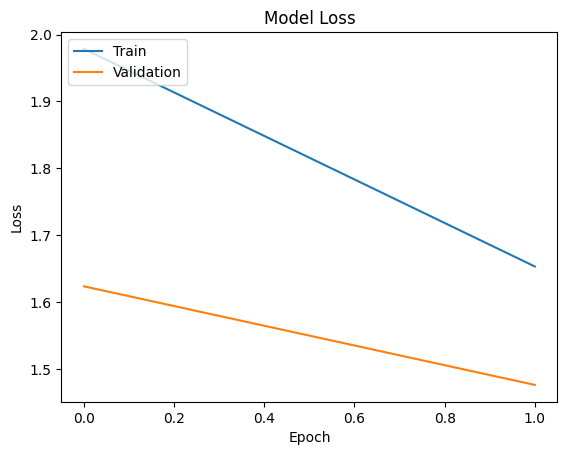

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()